# Optimize distance : forecasting of Lorenz data as a function of horizon and output variable

This notebook accompanies the following publication:
Paul Platzer, Arthur Avenas, Bertrand Chapron, Lucas Drumetz, Alexis Mouche, Léo Vinour. Distance Learning for Analog Methods. 2024. [⟨hal-04841334⟩](https://hal.science/hal-04841334)

It is used to run optimization algorithms for numerical experiments with Lorenz system data. In particular, we investigate the dependency of the optimal distance as a function of forecast horizon and output variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm
from sklearn.neighbors import NearestNeighbors
import sys
sys.path.append('../../functions/.')
from analogs import apply_transform, find_analogues, compute_weights, compute_diffs, compute_mae_mad, compute_error
from distance_learning import compute_gradient_MSE, compute_regularization, learn_distance

In [2]:
data_folder = '../../data/lorenz/'
output_folder = '../../output/lorenz/'

# Load catalog

In [3]:
npzfile = np.load(data_folder + 'catalog_small.npz')
traj_norm = npzfile['traj_norm']
stds = npzfile['stds']
tau = npzfile['tau']
dt = npzfile['dt']
Ntrain = npzfile['Ntrain']
h_max = npzfile['h_max']

# First optimization for smallest horizon $h = \mathrm{d}t = 0.01$ 

In [4]:
## Define training explanatory variable and forecast horizon
train_x = traj_norm[::int(tau/dt)][:Ntrain]
hh_ind0 = 1
horizon0 = dt * hh_ind0

## Set parameters for optimization
transform_matrix = np.eye(3)
k = 200
nn_algo = 'kd_tree'
regul_coef = [0]
n_epoch = 10
corr_length_train = 0
learning_rate_factor_whole = 5e2
learning_rate_factor_zzvar = 1e2
Itrain = np.arange(len(train_x))

### Run optimization ###

## First case : output variables =  all 3 variables
    
train_y = traj_norm[hh_ind0::int(tau/dt)][:Ntrain]

train_X = apply_transform(train_x, transform_matrix, Itrain)
        
nn = NearestNeighbors( algorithm = nn_algo , 
                          n_neighbors = k + 1 + 2*corr_length_train ) # leave-one-out procedure + anticipating time-correlated data
nn.fit(train_X)

mse_init = compute_error(train_X, train_y, Itrain, Itrain, k, nn, loo=True, corr_length_train=0, vector_out=False, error_type='MSE')

learning_rate = learning_rate_factor_whole / mse_init

result = learn_distance(train_x, train_y, transform_matrix, Itrain, Itrain, [], 
                   k = k, nn_algo=nn_algo, error_type='MSE', n_epoch=n_epoch,
                    learning_rate = learning_rate, regul_coef = regul_coef,
                   loo=True, corr_length_train=corr_length_train,
                     batch_size = len(train_X),
                         verbose_batch = True)

transform_optim_whole0 = result[0][-1].copy()
mse_optim_whole0 = result[2].copy()


## Second case : output variable = z variable
    
train_y = (traj_norm[hh_ind0::int(tau/dt),2][:Ntrain])[:,np.newaxis]

mse_init = compute_error(train_X, train_y, Itrain, Itrain, k, nn, loo=True, corr_length_train=0, vector_out=False, error_type='MSE')

learning_rate = learning_rate_factor_zzvar / mse_init

result = learn_distance(train_x, train_y, transform_matrix, Itrain, Itrain, [], 
                   k = k, nn_algo=nn_algo, error_type='MSE', n_epoch=n_epoch,
                    learning_rate = learning_rate, regul_coef = regul_coef,
                   loo=True, corr_length_train=corr_length_train,
                     batch_size = len(train_X),
                         verbose_batch = True)


transform_optim_zzvar0 = result[0][-1].copy()
mse_optim_zzvar0 = result[2].copy()

Starting distance-learning algorithm with the following parameters:
Error type = MSE
Transformation type = matrix (general linear transformation)
Number of analogues = 200
Learning rate = 442883.5761983934
Number of Epochs = 10
Mini-batch size = 100000
Regularization = [0]


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1/10   |   iter. 1/1 : 
MSE(batch) = 0.0011 ;  MSE(train) = 0.0011 ;  MSE(test) = [nan]
epoch 2/10   |   iter. 1/1 : 
MSE(batch) = 0.0008 ;  MSE(train) = 0.0008 ;  MSE(test) = [nan]
epoch 3/10   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 4/10   |   iter. 1/1 : 
MSE(batch) = 6.5783 ;  MSE(train) = 6.5783 ;  MSE(test) = [nan]
epoch 5/10   |   iter. 1/1 : 
MSE(batch) = 6.4911 ;  MSE(train) = 6.4911 ;  MSE(test) = [nan]
epoch 6/10   |   iter. 1/1 : 
MSE(batch) = 6.4159 ;  MSE(train) = 6.4159 ;  MSE(test) = [nan]
epoch 7/10   |   iter. 1/1 : 
MSE(batch) = 6.3500 ;  MSE(train) = 6.3500 ;  MSE(test) = [nan]
epoch 8/10   |   iter. 1/1 : 
MSE(batch) = 6.2917 ;  MSE(train) = 6.2917 ;  MSE(test) = [nan]
epoch 9/10   |   iter. 1/1 : 
MSE(batch) = 6.2395 ;  MSE(train) = 6.2395 ;  MSE(test) = [nan]
epoch 10/10   |   iter. 1/1 : 
MSE(batch) = 6.1924 ;  MSE(train) = 6.1924 ;  MSE(test) = [nan]
epoch. 10/10 :
MSE(train) = 6.14971559 ;  MSE(test) = [nan]

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1/10   |   iter. 1/1 : 
MSE(batch) = 0.0004 ;  MSE(train) = 0.0004 ;  MSE(test) = [nan]
epoch 2/10   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/10   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/10   |   iter. 1/1 : 
MSE(batch) = 3.6284 ;  MSE(train) = 3.6284 ;  MSE(test) = [nan]
epoch 5/10   |   iter. 1/1 : 
MSE(batch) = 2.8830 ;  MSE(train) = 2.8830 ;  MSE(test) = [nan]
epoch 6/10   |   iter. 1/1 : 
MSE(batch) = 2.6935 ;  MSE(train) = 2.6935 ;  MSE(test) = [nan]
epoch 7/10   |   iter. 1/1 : 
MSE(batch) = 2.5376 ;  MSE(train) = 2.5376 ;  MSE(test) = [nan]
epoch 8/10   |   iter. 1/1 : 
MSE(batch) = 2.4070 ;  MSE(train) = 2.4070 ;  MSE(test) = [nan]
epoch 9/10   |   iter. 1/1 : 
MSE(batch) = 2.2954 ;  MSE(train) = 2.2954 ;  MSE(test) = [nan]
epoch 10/10   |   iter. 1/1 : 
MSE(batch) = 2.1991 ;  MSE(train) = 2.1991 ;  MSE(test) = [nan]
epoch. 10/10 :
MSE(train) = 2.11522103 ;  MSE(test) = [nan]

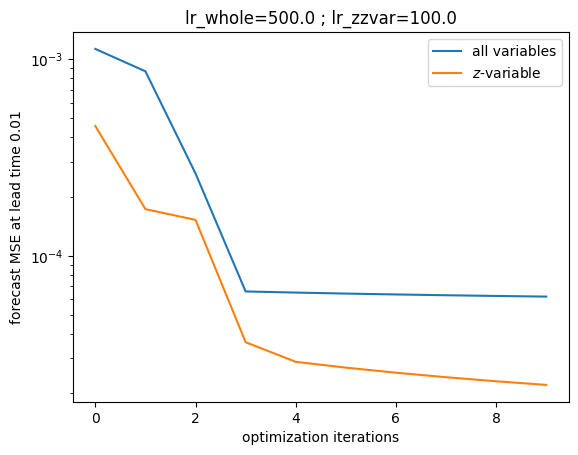

In [7]:
# Plot the evolution of MSE with iterations to check the behavior of the algorithm
plt.figure()
plt.plot(mse_optim_whole0, label='all variables')
plt.plot(mse_optim_zzvar0, label=r'$z$-variable')
plt.yscale('log')
plt.ylabel('forecast MSE at lead time 0.01')
plt.xlabel('optimization iterations')
plt.legend()
plt.title('lr_whole='+str(learning_rate_factor_whole)+' ; lr_zzvar='+str(learning_rate_factor_zzvar))
plt.show()

# Next optimization for horizons $h = i\times\mathrm{d}t$ with $i>1$ 

In [6]:
## Define forecast horizons
hh_ind = np.arange( int( 0.56 / dt ) )[1:]
horizon = dt * hh_ind

## Define other learning rate factors and number of iterations when iterating over different horizons
# learning_rate_factor_whole_horizon = 8e-4
# learning_rate_factor_zzvar_horizon = 1e-4
learning_rate_factor_whole_horizon = 8e1
learning_rate_factor_zzvar_horizon = 1e1
n_epoch_horizon = 20

## Empty lists to store optimized transform_matrices and 
hh_ind_done = []
transform_optim_whole = []
transform_optim_zzvar = []
mse_optim_whole = []
mse_optim_zzvar = []

## Initialize with pre-computed transform matrix for horizon 0.01
transform_optim_whole.append(transform_optim_whole0.copy())
transform_optim_zzvar.append(transform_optim_zzvar0.copy())
mse_optim_whole.append(mse_optim_whole0.copy())
mse_optim_zzvar.append(mse_optim_zzvar0.copy())
hh_ind_done.append( hh_ind0 )


#### Loop on forecast horizon ####

for i in tqdm(range(1,len(hh_ind))):
    
    ### Run optimization ###

    print('')
    print('Horizon = '+str(hh_ind[i]*dt))
    
    ## First case : output variables =  all 3 variables
        
    train_y = traj_norm[hh_ind[i]::int(tau/dt)][:Ntrain]
    
    train_X = apply_transform(train_x, transform_optim_whole[-1], Itrain)
            
    nn = NearestNeighbors( algorithm = nn_algo , 
                              n_neighbors = k + 1 + 2*corr_length_train ) # leave-one-out procedure + anticipating time-correlated data
    nn.fit(train_X)
    
    mse_init = compute_error(train_X, train_y, Itrain, Itrain, k, nn, loo=True, corr_length_train=0, vector_out=False, error_type='MSE')
    
    learning_rate = learning_rate_factor_whole / mse_init
    
    result = learn_distance(train_x, train_y, transform_optim_whole[-1], Itrain, Itrain, [], 
                       k = k, nn_algo=nn_algo, error_type='MSE', n_epoch=n_epoch_horizon,
                        learning_rate = learning_rate, regul_coef = regul_coef,
                       loo=True, corr_length_train=corr_length_train,
                         batch_size = len(train_X),
                             verbose_batch = True)

    transform_optim_whole.append( result[0][-1].copy() )
    mse_optim_whole.append( result[2].copy() )
    

    ## Second case : output variable = z variable
        
    train_y = (traj_norm[hh_ind[i]::int(tau/dt),2][:Ntrain])[:,np.newaxis]
    
    mse_init = compute_error(train_X, train_y, Itrain, Itrain, k, nn, loo=True, corr_length_train=0, vector_out=False, error_type='MSE')
    
    learning_rate = learning_rate_factor_zzvar / mse_init
    
    result = learn_distance(train_x, train_y, transform_optim_zzvar[-1], Itrain, Itrain, [], 
                       k = k, nn_algo=nn_algo, error_type='MSE', n_epoch=n_epoch_horizon,
                        learning_rate = learning_rate, regul_coef = regul_coef,
                       loo=True, corr_length_train=corr_length_train,
                         batch_size = len(train_X),
                             verbose_batch = True)

    transform_optim_zzvar.append( result[0][-1].copy() )
    mse_optim_zzvar.append( result[2].copy() )

    hh_ind_done.append( hh_ind[i].copy() )

  0%|          | 0/54 [00:00<?, ?it/s]


Horizon = 0.02
Starting distance-learning algorithm with the following parameters:
Error type = MSE
Transformation type = matrix (general linear transformation)
Number of analogues = 200
Learning rate = 8036179.87295407
Number of Epochs = 20
Mini-batch size = 100000
Regularization = [0]


  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.2218 ;  MSE(train) = 6.2218 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.6827 ;  MSE(train) = 5.6827 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.5390 ;  MSE(train) = 5.5390 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.4805 ;  MSE(train) = 5.4805 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.4435 ;  MSE(train) = 5.4435 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.4169 ;  MSE(train) = 5.4169 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.3964 ;  MSE(train) = 5.3964 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.3796 ;  MSE(train) = 5.3796 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.3654 ;  MSE(train) = 5.3654 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.3531 ;  MSE(train) = 5.3531 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.3422 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.7787 ;  MSE(train) = 3.7787 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.2262 ;  MSE(train) = 3.2262 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.5474 ;  MSE(train) = 2.5474 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.3350 ;  MSE(train) = 2.3350 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.6243 ;  MSE(train) = 1.6243 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.4454 ;  MSE(train) = 1.4454 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.3434 ;  MSE(train) = 1.3434 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.2831 ;  MSE(train) = 1.2831 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.2464 ;  MSE(train) = 1.2464 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.2226 ;  MSE(train) = 1.2226 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.2059 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.3257 ;  MSE(train) = 5.3257 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.3121 ;  MSE(train) = 5.3121 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.3028 ;  MSE(train) = 5.3028 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.2941 ;  MSE(train) = 5.2941 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.2859 ;  MSE(train) = 5.2859 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.2780 ;  MSE(train) = 5.2780 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.2705 ;  MSE(train) = 5.2705 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.2631 ;  MSE(train) = 5.2631 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.2560 ;  MSE(train) = 5.2560 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.2491 ;  MSE(train) = 5.2491 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.2423 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.6043 ;  MSE(train) = 1.6043 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.5409 ;  MSE(train) = 1.5409 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.5102 ;  MSE(train) = 1.5102 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.4895 ;  MSE(train) = 1.4895 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.4756 ;  MSE(train) = 1.4756 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.4675 ;  MSE(train) = 1.4675 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.4626 ;  MSE(train) = 1.4626 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.4593 ;  MSE(train) = 1.4593 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.4568 ;  MSE(train) = 1.4568 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.4547 ;  MSE(train) = 1.4547 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.4528 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.2642 ;  MSE(train) = 5.2642 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.2414 ;  MSE(train) = 5.2414 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.2460 ;  MSE(train) = 5.2460 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.2398 ;  MSE(train) = 5.2398 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.2062 ;  MSE(train) = 5.2062 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.2060 ;  MSE(train) = 5.2060 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.1902 ;  MSE(train) = 5.1902 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.1837 ;  MSE(train) = 5.1837 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.1542 ;  MSE(train) = 5.1542 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.1939 ;  MSE(train) = 5.1939 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.1462 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.7880 ;  MSE(train) = 1.7880 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.7515 ;  MSE(train) = 1.7515 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.7332 ;  MSE(train) = 1.7332 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.7199 ;  MSE(train) = 1.7199 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.7073 ;  MSE(train) = 1.7073 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.6966 ;  MSE(train) = 1.6966 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.6910 ;  MSE(train) = 1.6910 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.6885 ;  MSE(train) = 1.6885 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.6870 ;  MSE(train) = 1.6870 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.6859 ;  MSE(train) = 1.6859 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.6851 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.1787 ;  MSE(train) = 5.1787 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.1659 ;  MSE(train) = 5.1659 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.1615 ;  MSE(train) = 5.1615 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.1578 ;  MSE(train) = 5.1578 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.1539 ;  MSE(train) = 5.1539 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.1488 ;  MSE(train) = 5.1488 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.1405 ;  MSE(train) = 5.1405 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.1375 ;  MSE(train) = 5.1375 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.1417 ;  MSE(train) = 5.1417 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.1400 ;  MSE(train) = 5.1400 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.1469 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.9367 ;  MSE(train) = 1.9367 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.9135 ;  MSE(train) = 1.9135 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.9001 ;  MSE(train) = 1.9001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.8907 ;  MSE(train) = 1.8907 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.8839 ;  MSE(train) = 1.8839 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.8787 ;  MSE(train) = 1.8787 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.8748 ;  MSE(train) = 1.8748 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.8716 ;  MSE(train) = 1.8716 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.8691 ;  MSE(train) = 1.8691 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.8669 ;  MSE(train) = 1.8669 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.8650 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.2452 ;  MSE(train) = 5.2452 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.2038 ;  MSE(train) = 5.2038 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.1851 ;  MSE(train) = 5.1851 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.1813 ;  MSE(train) = 5.1813 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.1730 ;  MSE(train) = 5.1730 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.1764 ;  MSE(train) = 5.1764 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.1773 ;  MSE(train) = 5.1773 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.1946 ;  MSE(train) = 5.1946 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.1985 ;  MSE(train) = 5.1985 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.1745 ;  MSE(train) = 5.1745 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.1779 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.0363 ;  MSE(train) = 2.0363 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.0204 ;  MSE(train) = 2.0204 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.0111 ;  MSE(train) = 2.0111 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.0032 ;  MSE(train) = 2.0032 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.9950 ;  MSE(train) = 1.9950 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.9857 ;  MSE(train) = 1.9857 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.9762 ;  MSE(train) = 1.9762 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.9710 ;  MSE(train) = 1.9710 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.9685 ;  MSE(train) = 1.9685 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.9669 ;  MSE(train) = 1.9669 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.9656 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.2568 ;  MSE(train) = 5.2568 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.2664 ;  MSE(train) = 5.2664 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.2942 ;  MSE(train) = 5.2942 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.2480 ;  MSE(train) = 5.2480 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.2483 ;  MSE(train) = 5.2483 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.2525 ;  MSE(train) = 5.2525 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.2724 ;  MSE(train) = 5.2724 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.2666 ;  MSE(train) = 5.2666 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.2967 ;  MSE(train) = 5.2967 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.2456 ;  MSE(train) = 5.2456 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.2442 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.0837 ;  MSE(train) = 2.0837 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.0678 ;  MSE(train) = 2.0678 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.0517 ;  MSE(train) = 2.0517 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.0355 ;  MSE(train) = 2.0355 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.0231 ;  MSE(train) = 2.0231 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.0145 ;  MSE(train) = 2.0145 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.0058 ;  MSE(train) = 2.0058 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.9946 ;  MSE(train) = 1.9946 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.9821 ;  MSE(train) = 1.9821 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.9671 ;  MSE(train) = 1.9671 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.9425 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.3833 ;  MSE(train) = 5.3833 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.3955 ;  MSE(train) = 5.3955 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.3766 ;  MSE(train) = 5.3766 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.3689 ;  MSE(train) = 5.3689 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.3724 ;  MSE(train) = 5.3724 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.3751 ;  MSE(train) = 5.3751 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.3860 ;  MSE(train) = 5.3860 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.3667 ;  MSE(train) = 5.3667 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.3661 ;  MSE(train) = 5.3661 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.3665 ;  MSE(train) = 5.3665 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.3681 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.9631 ;  MSE(train) = 1.9631 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.9455 ;  MSE(train) = 1.9455 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.9213 ;  MSE(train) = 1.9213 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.8846 ;  MSE(train) = 1.8846 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.8778 ;  MSE(train) = 1.8778 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.8731 ;  MSE(train) = 1.8731 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.8695 ;  MSE(train) = 1.8695 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.8667 ;  MSE(train) = 1.8667 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.8646 ;  MSE(train) = 1.8646 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.8629 ;  MSE(train) = 1.8629 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.8616 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.5359 ;  MSE(train) = 5.5359 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.5317 ;  MSE(train) = 5.5317 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.5314 ;  MSE(train) = 5.5314 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.5313 ;  MSE(train) = 5.5313 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.5313 ;  MSE(train) = 5.5313 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.5312 ;  MSE(train) = 5.5312 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.5313 ;  MSE(train) = 5.5313 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.5313 ;  MSE(train) = 5.5313 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.5315 ;  MSE(train) = 5.5315 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.5314 ;  MSE(train) = 5.5314 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.5318 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.8874 ;  MSE(train) = 1.8874 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.8716 ;  MSE(train) = 1.8716 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.8659 ;  MSE(train) = 1.8659 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.8619 ;  MSE(train) = 1.8619 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.8583 ;  MSE(train) = 1.8583 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.8545 ;  MSE(train) = 1.8545 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.8501 ;  MSE(train) = 1.8501 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.8461 ;  MSE(train) = 1.8461 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.8435 ;  MSE(train) = 1.8435 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.8420 ;  MSE(train) = 1.8420 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.8409 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.7417 ;  MSE(train) = 5.7417 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.7326 ;  MSE(train) = 5.7326 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.7297 ;  MSE(train) = 5.7297 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.7229 ;  MSE(train) = 5.7229 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.7077 ;  MSE(train) = 5.7077 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.6972 ;  MSE(train) = 5.6972 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.6948 ;  MSE(train) = 5.6948 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.6935 ;  MSE(train) = 5.6935 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.6940 ;  MSE(train) = 5.6940 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.6947 ;  MSE(train) = 5.6947 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.6993 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.8891 ;  MSE(train) = 1.8891 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.8829 ;  MSE(train) = 1.8829 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.8819 ;  MSE(train) = 1.8819 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.8818 ;  MSE(train) = 1.8818 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.8817 ;  MSE(train) = 1.8817 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.8818 ;  MSE(train) = 1.8818 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.8819 ;  MSE(train) = 1.8819 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.8821 ;  MSE(train) = 1.8821 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.8821 ;  MSE(train) = 1.8821 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.8824 ;  MSE(train) = 1.8824 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.8826 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.8699 ;  MSE(train) = 5.8699 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.8656 ;  MSE(train) = 5.8656 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.8682 ;  MSE(train) = 5.8682 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.8741 ;  MSE(train) = 5.8741 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.8866 ;  MSE(train) = 5.8866 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.8663 ;  MSE(train) = 5.8663 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.8682 ;  MSE(train) = 5.8682 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.8798 ;  MSE(train) = 5.8798 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.8646 ;  MSE(train) = 5.8646 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.8670 ;  MSE(train) = 5.8670 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.8779 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 1.9831 ;  MSE(train) = 1.9831 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 1.9772 ;  MSE(train) = 1.9772 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 1.9753 ;  MSE(train) = 1.9753 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 1.9745 ;  MSE(train) = 1.9745 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 1.9741 ;  MSE(train) = 1.9741 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 1.9739 ;  MSE(train) = 1.9739 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 1.9738 ;  MSE(train) = 1.9738 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 1.9737 ;  MSE(train) = 1.9737 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 1.9737 ;  MSE(train) = 1.9737 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 1.9736 ;  MSE(train) = 1.9736 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 1.9736 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.0864 ;  MSE(train) = 6.0864 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 6.0804 ;  MSE(train) = 6.0804 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.0740 ;  MSE(train) = 6.0740 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.0679 ;  MSE(train) = 6.0679 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.0648 ;  MSE(train) = 6.0648 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.0630 ;  MSE(train) = 6.0630 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.0623 ;  MSE(train) = 6.0623 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.0645 ;  MSE(train) = 6.0645 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.0625 ;  MSE(train) = 6.0625 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.0675 ;  MSE(train) = 6.0675 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.0564 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.1029 ;  MSE(train) = 2.1029 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.0991 ;  MSE(train) = 2.0991 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.0980 ;  MSE(train) = 2.0980 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.0976 ;  MSE(train) = 2.0976 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.0974 ;  MSE(train) = 2.0974 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.0972 ;  MSE(train) = 2.0972 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.0971 ;  MSE(train) = 2.0971 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.0969 ;  MSE(train) = 2.0969 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.0968 ;  MSE(train) = 2.0968 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.0967 ;  MSE(train) = 2.0967 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.0966 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.2467 ;  MSE(train) = 6.2467 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 6.2446 ;  MSE(train) = 6.2446 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.2504 ;  MSE(train) = 6.2504 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.2537 ;  MSE(train) = 6.2537 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.2794 ;  MSE(train) = 6.2794 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.2655 ;  MSE(train) = 6.2655 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.2648 ;  MSE(train) = 6.2648 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.2423 ;  MSE(train) = 6.2423 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.2445 ;  MSE(train) = 6.2445 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.2537 ;  MSE(train) = 6.2537 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.2954 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.2464 ;  MSE(train) = 2.2464 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.2443 ;  MSE(train) = 2.2443 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.2435 ;  MSE(train) = 2.2435 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.2431 ;  MSE(train) = 2.2431 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.2428 ;  MSE(train) = 2.2428 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.2425 ;  MSE(train) = 2.2425 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.2423 ;  MSE(train) = 2.2423 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.2421 ;  MSE(train) = 2.2421 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.2420 ;  MSE(train) = 2.2420 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.2419 ;  MSE(train) = 2.2419 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.2418 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.4900 ;  MSE(train) = 6.4900 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 6.4896 ;  MSE(train) = 6.4896 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.5541 ;  MSE(train) = 6.5541 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.6509 ;  MSE(train) = 6.6509 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.5833 ;  MSE(train) = 6.5833 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.6493 ;  MSE(train) = 6.6493 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.6804 ;  MSE(train) = 6.6804 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.7487 ;  MSE(train) = 6.7487 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.5314 ;  MSE(train) = 6.5314 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.4662 ;  MSE(train) = 6.4662 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.4589 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.4110 ;  MSE(train) = 2.4110 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.4100 ;  MSE(train) = 2.4100 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.4097 ;  MSE(train) = 2.4097 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.4096 ;  MSE(train) = 2.4096 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.4095 ;  MSE(train) = 2.4095 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.4095 ;  MSE(train) = 2.4095 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.4094 ;  MSE(train) = 2.4094 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.4094 ;  MSE(train) = 2.4094 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.4094 ;  MSE(train) = 2.4094 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.4094 ;  MSE(train) = 2.4094 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.4094 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.9554 ;  MSE(train) = 6.9554 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 7.2137 ;  MSE(train) = 7.2137 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 7.2509 ;  MSE(train) = 7.2509 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.7923 ;  MSE(train) = 6.7923 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.8740 ;  MSE(train) = 6.8740 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.7339 ;  MSE(train) = 6.7339 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.7133 ;  MSE(train) = 6.7133 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.7059 ;  MSE(train) = 6.7059 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.7541 ;  MSE(train) = 6.7541 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.8520 ;  MSE(train) = 6.8520 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.9448 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.5993 ;  MSE(train) = 2.5993 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.5979 ;  MSE(train) = 2.5979 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.5972 ;  MSE(train) = 2.5972 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.5965 ;  MSE(train) = 2.5965 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.5958 ;  MSE(train) = 2.5958 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.5951 ;  MSE(train) = 2.5951 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.5944 ;  MSE(train) = 2.5944 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.5937 ;  MSE(train) = 2.5937 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.5931 ;  MSE(train) = 2.5931 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.5926 ;  MSE(train) = 2.5926 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.5921 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.9945 ;  MSE(train) = 6.9945 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 7.0305 ;  MSE(train) = 7.0305 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 7.3414 ;  MSE(train) = 7.3414 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 7.3555 ;  MSE(train) = 7.3555 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 7.4473 ;  MSE(train) = 7.4473 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 7.6094 ;  MSE(train) = 7.6094 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 7.0645 ;  MSE(train) = 7.0645 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 7.1125 ;  MSE(train) = 7.1125 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 7.3903 ;  MSE(train) = 7.3903 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 7.2860 ;  MSE(train) = 7.2860 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 7.0670 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 2.7910 ;  MSE(train) = 2.7910 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 2.7903 ;  MSE(train) = 2.7903 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 2.7897 ;  MSE(train) = 2.7897 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 2.7891 ;  MSE(train) = 2.7891 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 2.7885 ;  MSE(train) = 2.7885 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 2.7880 ;  MSE(train) = 2.7880 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.7874 ;  MSE(train) = 2.7874 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.7869 ;  MSE(train) = 2.7869 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.7863 ;  MSE(train) = 2.7863 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.7858 ;  MSE(train) = 2.7858 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.7853 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 8.0864 ;  MSE(train) = 8.0864 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 7.6851 ;  MSE(train) = 7.6851 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 7.5966 ;  MSE(train) = 7.5966 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 7.5006 ;  MSE(train) = 7.5006 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 7.4773 ;  MSE(train) = 7.4773 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 7.7710 ;  MSE(train) = 7.7710 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 7.6012 ;  MSE(train) = 7.6012 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 7.4360 ;  MSE(train) = 7.4360 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 7.4937 ;  MSE(train) = 7.4937 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 7.6287 ;  MSE(train) = 7.6287 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 7.4782 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.0040 ;  MSE(train) = 3.0040 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.0032 ;  MSE(train) = 3.0032 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.0024 ;  MSE(train) = 3.0024 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.0016 ;  MSE(train) = 3.0016 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.0008 ;  MSE(train) = 3.0008 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.0001 ;  MSE(train) = 3.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 2.9993 ;  MSE(train) = 2.9993 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 2.9985 ;  MSE(train) = 2.9985 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 2.9978 ;  MSE(train) = 2.9978 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 2.9970 ;  MSE(train) = 2.9970 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 2.9962 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 8.0487 ;  MSE(train) = 8.0487 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 7.8759 ;  MSE(train) = 7.8759 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 8.2853 ;  MSE(train) = 8.2853 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 8.1321 ;  MSE(train) = 8.1321 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 7.7772 ;  MSE(train) = 7.7772 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 7.8114 ;  MSE(train) = 7.8114 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 7.8462 ;  MSE(train) = 7.8462 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 8.0654 ;  MSE(train) = 8.0654 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 8.0038 ;  MSE(train) = 8.0038 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 8.3682 ;  MSE(train) = 8.3682 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 8.1383 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.2351 ;  MSE(train) = 3.2351 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.2338 ;  MSE(train) = 3.2338 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.2326 ;  MSE(train) = 3.2326 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.2314 ;  MSE(train) = 3.2314 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.2302 ;  MSE(train) = 3.2302 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.2290 ;  MSE(train) = 3.2290 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 3.2278 ;  MSE(train) = 3.2278 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 3.2266 ;  MSE(train) = 3.2266 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 3.2254 ;  MSE(train) = 3.2254 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 3.2242 ;  MSE(train) = 3.2242 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 3.2229 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 8.2107 ;  MSE(train) = 8.2107 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 8.1277 ;  MSE(train) = 8.1277 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 8.3681 ;  MSE(train) = 8.3681 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 8.7528 ;  MSE(train) = 8.7528 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 8.5932 ;  MSE(train) = 8.5932 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 8.7224 ;  MSE(train) = 8.7224 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 8.6931 ;  MSE(train) = 8.6931 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 8.2102 ;  MSE(train) = 8.2102 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 8.2066 ;  MSE(train) = 8.2066 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 8.2479 ;  MSE(train) = 8.2479 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 8.1880 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.4824 ;  MSE(train) = 3.4824 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.4801 ;  MSE(train) = 3.4801 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.4778 ;  MSE(train) = 3.4778 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.4754 ;  MSE(train) = 3.4754 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.4728 ;  MSE(train) = 3.4728 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.4699 ;  MSE(train) = 3.4699 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 3.4663 ;  MSE(train) = 3.4663 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 3.4613 ;  MSE(train) = 3.4613 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 3.4534 ;  MSE(train) = 3.4534 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 3.4398 ;  MSE(train) = 3.4398 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 3.4218 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 8.7905 ;  MSE(train) = 8.7905 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 8.7478 ;  MSE(train) = 8.7478 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 8.7376 ;  MSE(train) = 8.7376 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 8.7544 ;  MSE(train) = 8.7544 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 8.5865 ;  MSE(train) = 8.5865 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 8.7575 ;  MSE(train) = 8.7575 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 8.6041 ;  MSE(train) = 8.6041 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 8.7858 ;  MSE(train) = 8.7858 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 8.5728 ;  MSE(train) = 8.5728 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 8.8530 ;  MSE(train) = 8.8530 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 8.6856 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.6524 ;  MSE(train) = 3.6524 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.6456 ;  MSE(train) = 3.6456 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.6394 ;  MSE(train) = 3.6394 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.6335 ;  MSE(train) = 3.6335 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.6276 ;  MSE(train) = 3.6276 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.6218 ;  MSE(train) = 3.6218 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 3.6163 ;  MSE(train) = 3.6163 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 3.6109 ;  MSE(train) = 3.6109 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 3.6055 ;  MSE(train) = 3.6055 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 3.5999 ;  MSE(train) = 3.5999 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 3.5938 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 9.0980 ;  MSE(train) = 9.0980 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 9.3332 ;  MSE(train) = 9.3332 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 9.3874 ;  MSE(train) = 9.3874 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 9.2428 ;  MSE(train) = 9.2428 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 9.1241 ;  MSE(train) = 9.1241 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 9.1099 ;  MSE(train) = 9.1099 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 9.1746 ;  MSE(train) = 9.1746 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 9.4517 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.7418 ;  MSE(train) = 3.7418 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.7380 ;  MSE(train) = 3.7380 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.7344 ;  MSE(train) = 3.7344 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.7311 ;  MSE(train) = 3.7311 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.7280 ;  MSE(train) = 3.7280 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.7251 ;  MSE(train) = 3.7251 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 3.7223 ;  MSE(train) = 3.7223 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 3.7198 ;  MSE(train) = 3.7198 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 3.7173 ;  MSE(train) = 3.7173 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 3.7150 ;  MSE(train) = 3.7150 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 3.7127 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 9.9716 ;  MSE(train) = 9.9716 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 9.7965 ;  MSE(train) = 9.7965 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 9.8980 ;  MSE(train) = 9.8980 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 9.8880 ;  MSE(train) = 9.8880 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 9.7931 ;  MSE(train) = 9.7931 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 9.9928 ;  MSE(train) = 9.9928 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 9.5944 ;  MSE(train) = 9.5944 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 9.6829 ;  MSE(train) = 9.6829 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 9.7712 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 3.9218 ;  MSE(train) = 3.9218 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 3.9201 ;  MSE(train) = 3.9201 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 3.9184 ;  MSE(train) = 3.9184 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 3.9169 ;  MSE(train) = 3.9169 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 3.9154 ;  MSE(train) = 3.9154 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 3.9140 ;  MSE(train) = 3.9140 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 3.9127 ;  MSE(train) = 3.9127 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 3.9114 ;  MSE(train) = 3.9114 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 3.9102 ;  MSE(train) = 3.9102 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 3.9091 ;  MSE(train) = 3.9091 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 3.9080 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 4.1330 ;  MSE(train) = 4.1330 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 4.1387 ;  MSE(train) = 4.1387 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 4.1543 ;  MSE(train) = 4.1543 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 4.1729 ;  MSE(train) = 4.1729 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 4.1732 ;  MSE(train) = 4.1732 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 4.1688 ;  MSE(train) = 4.1688 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 4.1691 ;  MSE(train) = 4.1691 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 4.1694 ;  MSE(train) = 4.1694 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 4.1670 ;  MSE(train) = 4.1670 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 4.1669 ;  MSE(train) = 4.1669 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 4.1657 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 4.4176 ;  MSE(train) = 4.4176 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 4.4431 ;  MSE(train) = 4.4431 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 4.4142 ;  MSE(train) = 4.4142 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 4.4326 ;  MSE(train) = 4.4326 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 4.4279 ;  MSE(train) = 4.4279 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 4.4295 ;  MSE(train) = 4.4295 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 4.4209 ;  MSE(train) = 4.4209 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 4.4327 ;  MSE(train) = 4.4327 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 4.4166 ;  MSE(train) = 4.4166 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 4.4307 ;  MSE(train) = 4.4307 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 4.4179 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 4.6807 ;  MSE(train) = 4.6807 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 4.7197 ;  MSE(train) = 4.7197 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 4.7312 ;  MSE(train) = 4.7312 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 4.6416 ;  MSE(train) = 4.6416 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 4.7175 ;  MSE(train) = 4.7175 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 4.7448 ;  MSE(train) = 4.7448 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 4.7004 ;  MSE(train) = 4.7004 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 4.6537 ;  MSE(train) = 4.6537 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 4.7560 ;  MSE(train) = 4.7560 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 4.6294 ;  MSE(train) = 4.6294 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 4.6028 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 4.9030 ;  MSE(train) = 4.9030 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 4.9737 ;  MSE(train) = 4.9737 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.1081 ;  MSE(train) = 5.1081 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 4.9677 ;  MSE(train) = 4.9677 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 4.9214 ;  MSE(train) = 4.9214 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.0659 ;  MSE(train) = 5.0659 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 4.9214 ;  MSE(train) = 4.9214 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 4.9652 ;  MSE(train) = 4.9652 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.0749 ;  MSE(train) = 5.0749 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 4.9487 ;  MSE(train) = 4.9487 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 4.9259 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.2245 ;  MSE(train) = 5.2245 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.4343 ;  MSE(train) = 5.4343 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.2707 ;  MSE(train) = 5.2707 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.1614 ;  MSE(train) = 5.1614 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.3755 ;  MSE(train) = 5.3755 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.2357 ;  MSE(train) = 5.2357 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.1367 ;  MSE(train) = 5.1367 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.3222 ;  MSE(train) = 5.3222 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.3085 ;  MSE(train) = 5.3085 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.3003 ;  MSE(train) = 5.3003 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.1165 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.5809 ;  MSE(train) = 5.5809 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.4869 ;  MSE(train) = 5.4869 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 5.6646 ;  MSE(train) = 5.6646 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.5856 ;  MSE(train) = 5.5856 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.5012 ;  MSE(train) = 5.5012 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 5.5366 ;  MSE(train) = 5.5366 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 5.7053 ;  MSE(train) = 5.7053 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.5248 ;  MSE(train) = 5.5248 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.5378 ;  MSE(train) = 5.5378 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.7112 ;  MSE(train) = 5.7112 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.5322 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 5.9317 ;  MSE(train) = 5.9317 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 5.8934 ;  MSE(train) = 5.8934 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.0004 ;  MSE(train) = 6.0004 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 5.8743 ;  MSE(train) = 5.8743 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 5.8853 ;  MSE(train) = 5.8853 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.0276 ;  MSE(train) = 6.0276 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.0217 ;  MSE(train) = 6.0217 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 5.8604 ;  MSE(train) = 5.8604 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 5.8702 ;  MSE(train) = 5.8702 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 5.9234 ;  MSE(train) = 5.9234 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 5.9223 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 6.3583 ;  MSE(train) = 6.3583 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 6.3576 ;  MSE(train) = 6.3576 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.3571 ;  MSE(train) = 6.3571 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.3570 ;  MSE(train) = 6.3570 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.3583 ;  MSE(train) = 6.3583 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.3632 ;  MSE(train) = 6.3632 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.3754 ;  MSE(train) = 6.3754 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.4046 ;  MSE(train) = 6.4046 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.3940 ;  MSE(train) = 6.3940 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.4120 ;  MSE(train) = 6.4120 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.3896 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 7.0169 ;  MSE(train) = 7.0169 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 6.9998 ;  MSE(train) = 6.9998 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 6.9976 ;  MSE(train) = 6.9976 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 6.9964 ;  MSE(train) = 6.9964 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 6.9957 ;  MSE(train) = 6.9957 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 6.9949 ;  MSE(train) = 6.9949 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 6.9943 ;  MSE(train) = 6.9943 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 6.9937 ;  MSE(train) = 6.9937 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 6.9931 ;  MSE(train) = 6.9931 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 6.9926 ;  MSE(train) = 6.9926 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 6.9921 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 7.7989 ;  MSE(train) = 7.7989 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 7.7958 ;  MSE(train) = 7.7958 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 7.7947 ;  MSE(train) = 7.7947 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 7.7938 ;  MSE(train) = 7.7938 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 7.7930 ;  MSE(train) = 7.7930 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 7.7922 ;  MSE(train) = 7.7922 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 7.7913 ;  MSE(train) = 7.7913 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 7.7906 ;  MSE(train) = 7.7906 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 7.7898 ;  MSE(train) = 7.7898 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 7.7891 ;  MSE(train) = 7.7891 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 7.7884 ;  MSE(t

  0%|          | 0/20 [00:00<?, ?it/s]

epoch 1/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 2/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 3/20   |   iter. 1/1 : 
MSE(batch) = 0.0001 ;  MSE(train) = 0.0001 ;  MSE(test) = [nan]
epoch 4/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 5/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 6/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 7/20   |   iter. 1/1 : 
MSE(batch) = 0.0007 ;  MSE(train) = 0.0007 ;  MSE(test) = [nan]
epoch 8/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 9/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 10/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(train) = 0.0002 ;  MSE(test) = [nan]
epoch 11/20   |   iter. 1/1 : 
MSE(batch) = 0.0002 ;  MSE(t

KeyboardInterrupt: 

In [10]:
# Convert lists to arrays
hh_ind_done = np.array(hh_ind_done)
transform_optim_whole = np.array(transform_optim_whole)
transform_optim_zzvar = np.array(transform_optim_zzvar)
mse_optim_whole = np.array(mse_optim_whole[1:])
mse_optim_zzvar = np.array(mse_optim_zzvar[1:])

In [11]:
# Save
np.savez(output_folder + 'optim_lorenz_horizon_variable.npz',
         hh_ind_done = hh_ind_done ,
         horizon = horizon ,
         transform_optim_whole = transform_optim_whole ,
         transform_optim_zzvar = transform_optim_zzvar ,
         mse_optim_whole = mse_optim_whole ,
         mse_optim_zzvar = mse_optim_zzvar ,
         mse_optim_whole0 = mse_optim_whole0 ,
         mse_optim_zzvar0 = mse_optim_zzvar0 ,
         k = k ,
         n_iter = n_iter ,
         n_iter_horizon = n_iter_horizon ,
         learning_rate_factor_whole = learning_rate_factor_whole ,
         learning_rate_factor_zzvar = learning_rate_factor_zzvar ,
         learning_rate_factor_whole_horizon = learning_rate_factor_whole_horizon ,
         learning_rate_factor_zzvar_horizon = learning_rate_factor_zzvar_horizon ,
        )